In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
print("Loading the dataset...")
from google.colab import files
uploaded = files.upload()

Loading the dataset...


Saving Obesity Classification.csv to Obesity Classification (1).csv


In [ ]:
# Load the dataset
df = pd.read_csv('Obesity Classification.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [ ]:
# Display basic information about the dataset
print("\n--- Dataset Information ---")
print(f"Shape of the dataset: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())


--- Dataset Information ---
Shape of the dataset: (108, 7)

First 5 rows of the dataset:
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [ ]:
print("\nDataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None


In [ ]:
print("\nDescriptive Statistics:")
print(df.describe().round(2))


Descriptive Statistics:
           ID     Age  Height  Weight     BMI
count  108.00  108.00  108.00  108.00  108.00
mean    56.05   46.56  166.57   59.49   20.55
std     31.92   24.72   27.87   28.86    7.58
min      1.00   11.00  120.00   10.00    3.90
25%     28.75   27.00  140.00   35.00   16.70
50%     56.50   42.50  175.00   55.00   21.20
75%     83.25   59.25  190.00   85.00   26.10
max    110.00  112.00  210.00  120.00   37.20


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64



--- Target Variable Analysis ---
Label Distribution:
Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64


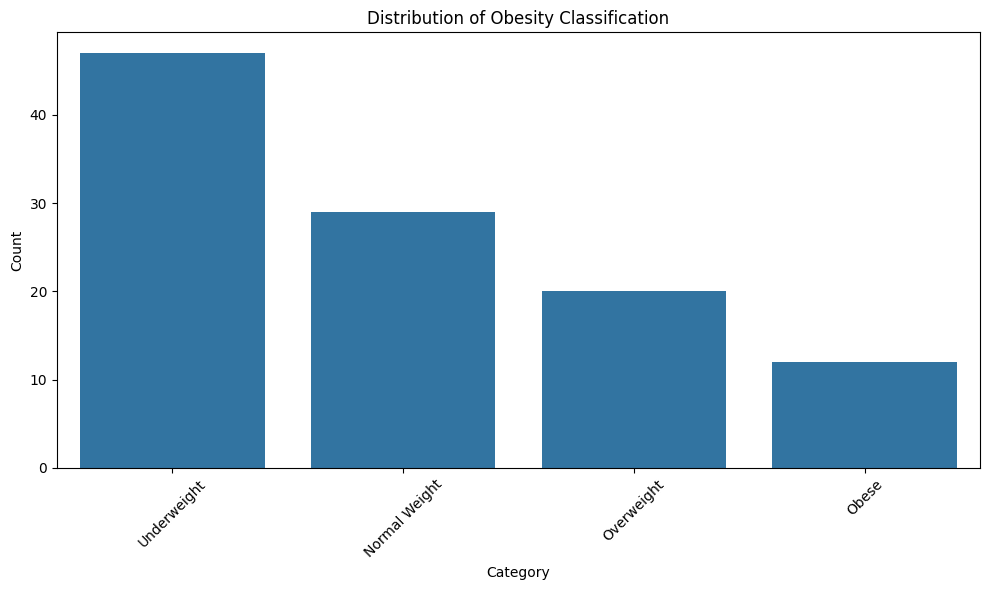

In [ ]:
# Analyze the distribution of the target variable (Label)
print("\n--- Target Variable Analysis ---")
label_counts = df['Label'].value_counts()
print("Label Distribution:")
print(label_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df, order=label_counts.index)
plt.title('Distribution of Obesity Classification')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

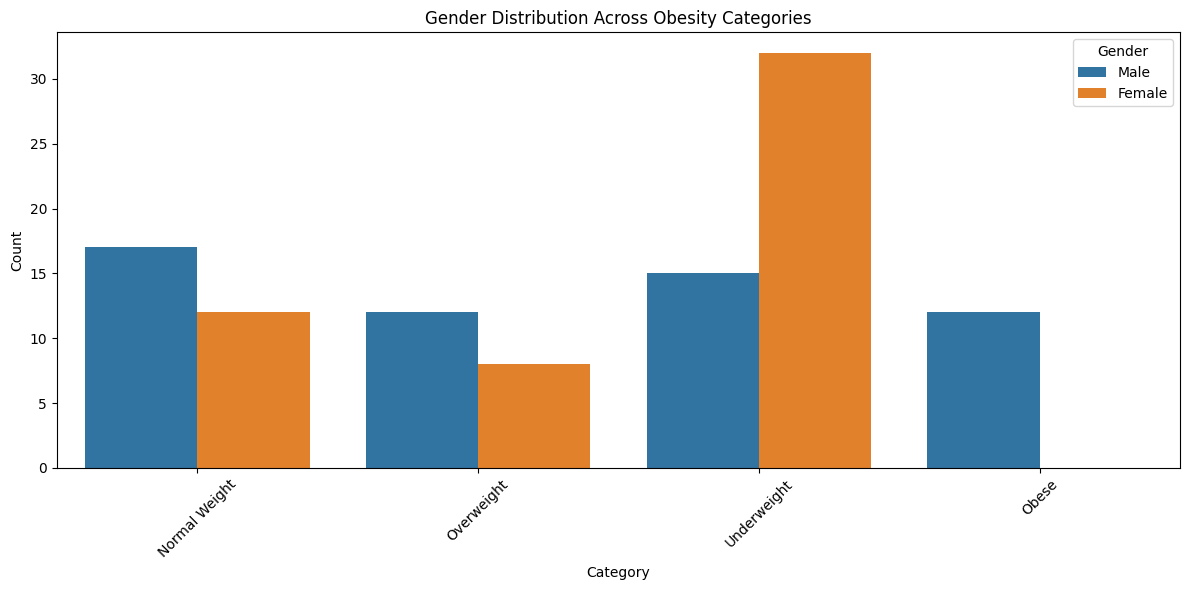

In [ ]:
# Gender distribution across different obesity categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Label', hue='Gender', data=df)
plt.title('Gender Distribution Across Obesity Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


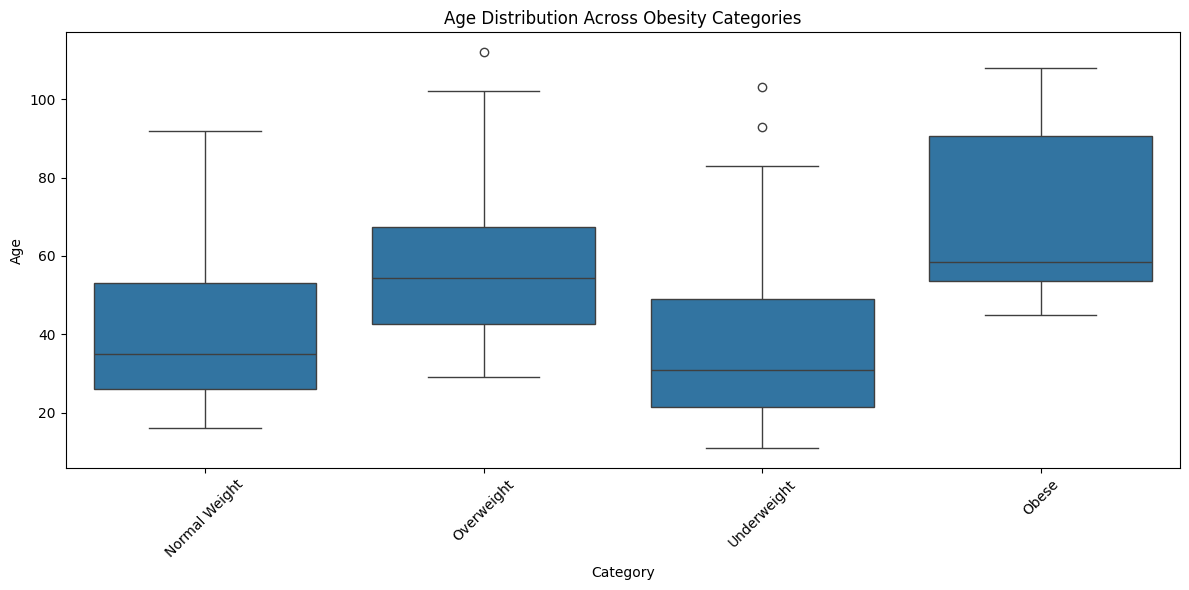

In [ ]:
# Age distribution across different obesity categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Age', data=df)
plt.title('Age Distribution Across Obesity Categories')
plt.xlabel('Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

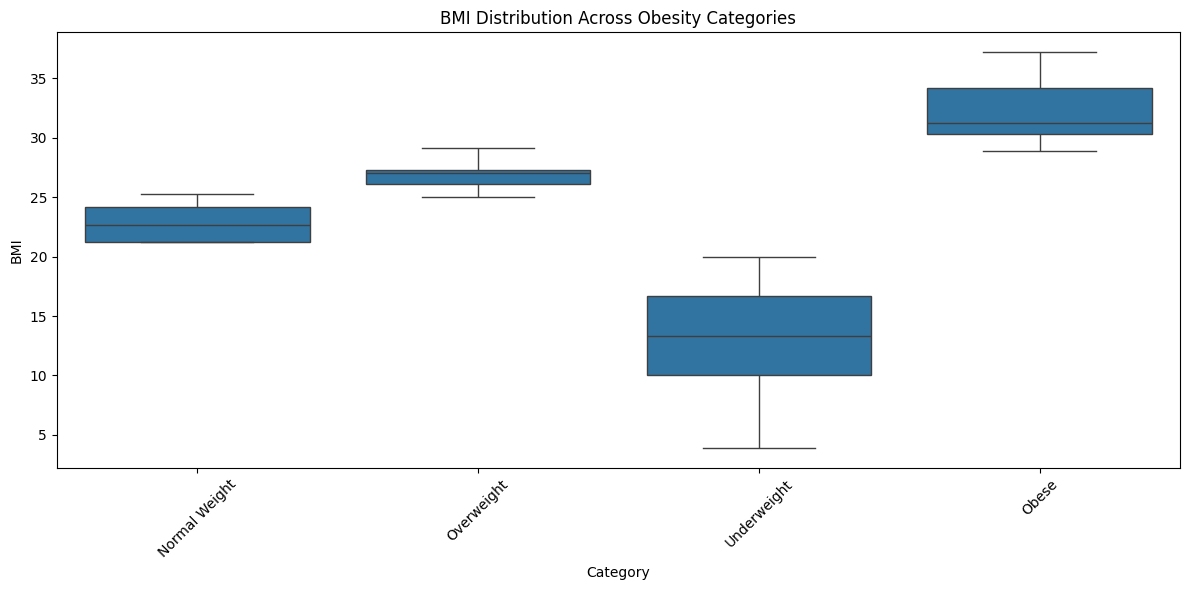

In [ ]:
# BMI analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='BMI', data=df)
plt.title('BMI Distribution Across Obesity Categories')
plt.xlabel('Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

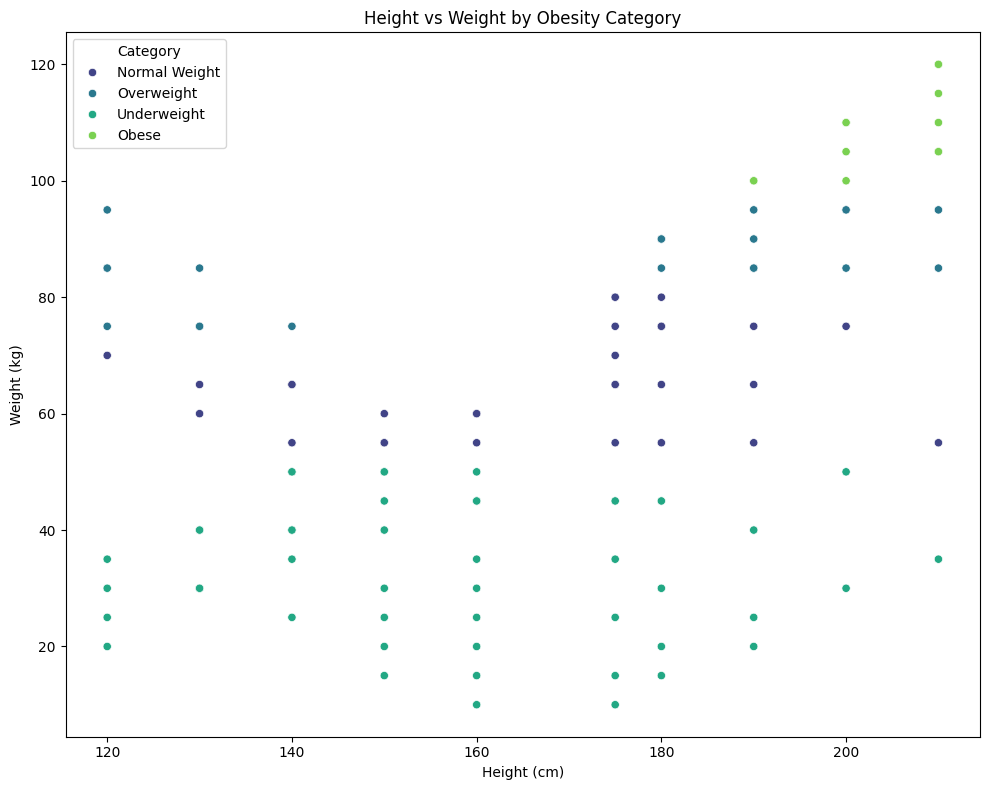

In [ ]:
# Height and Weight relationship
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Height', y='Weight', hue='Label', data=df, palette='viridis')
plt.title('Height vs Weight by Obesity Category')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


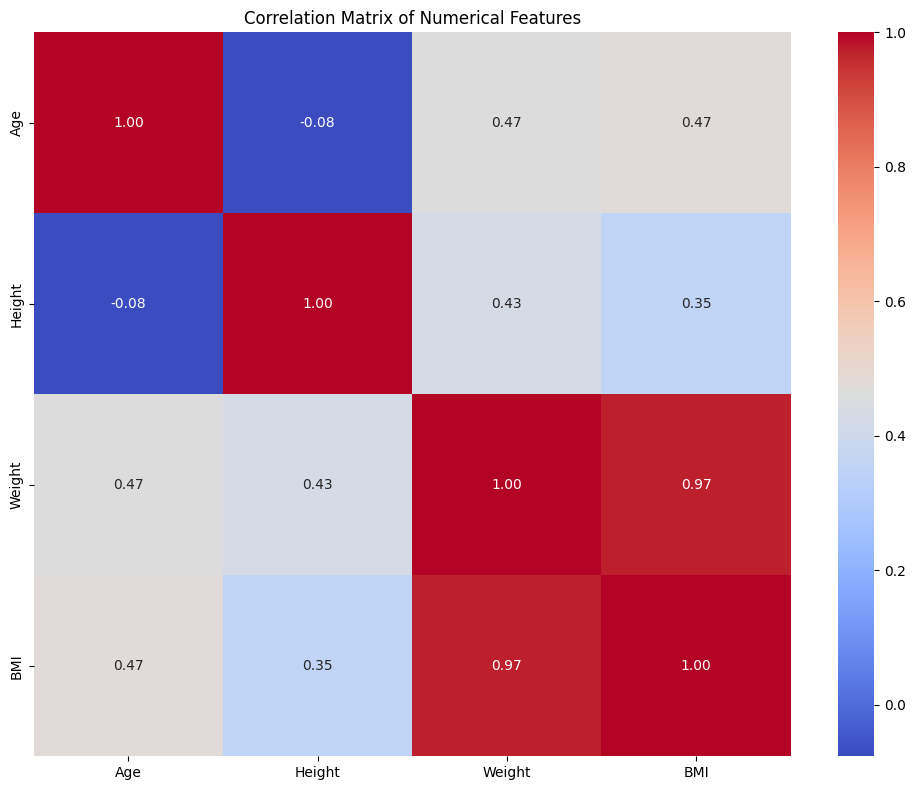


Correlation Matrix:
         Age  Height  Weight   BMI
Age     1.00   -0.08    0.47  0.47
Height -0.08    1.00    0.43  0.35
Weight  0.47    0.43    1.00  0.97
BMI     0.47    0.35    0.97  1.00


In [ ]:
# Correlation matrix of numerical features
plt.figure(figsize=(10, 8))
numerical_features = ['Age', 'Height', 'Weight', 'BMI']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix.round(2))

In [ ]:
# Encode categorical variables
print("\n--- Data Preprocessing ---")
print("Encoding categorical variables...")
label_encoder = LabelEncoder()
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

print("\nTarget Label Encoding:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")


--- Data Preprocessing ---
Encoding categorical variables...

Target Label Encoding:
0: Normal Weight
1: Obese
2: Overweight
3: Underweight


In [ ]:
# Feature selection and data preparation
print("\nPreparing features and target variable...")
X = df[['Age', 'Gender_Encoded', 'Height', 'Weight']]
y = df['Label_Encoded']


Preparing features and target variable...


In [ ]:
# Split the data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Splitting data into training and testing sets...
Training set size: 86
Testing set size: 22


In [ ]:
# Scale the features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling features...


In [ ]:
# Initial KNN model with default parameters
print("\n--- KNN Model Construction ---")
print("Building initial KNN model...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


--- KNN Model Construction ---
Building initial KNN model...


KNeighborsClassifier()

In [ ]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

In [ ]:
# Evaluate the model
print("\n--- Initial Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


--- Initial Model Evaluation ---
Accuracy: 0.9545

Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      0.83      0.91         6
        Obese       1.00      1.00      1.00         2
   Overweight       1.00      1.00      1.00         4
  Underweight       0.91      1.00      0.95        10

     accuracy                           0.95        22
    macro avg       0.98      0.96      0.97        22
 weighted avg       0.96      0.95      0.95        22



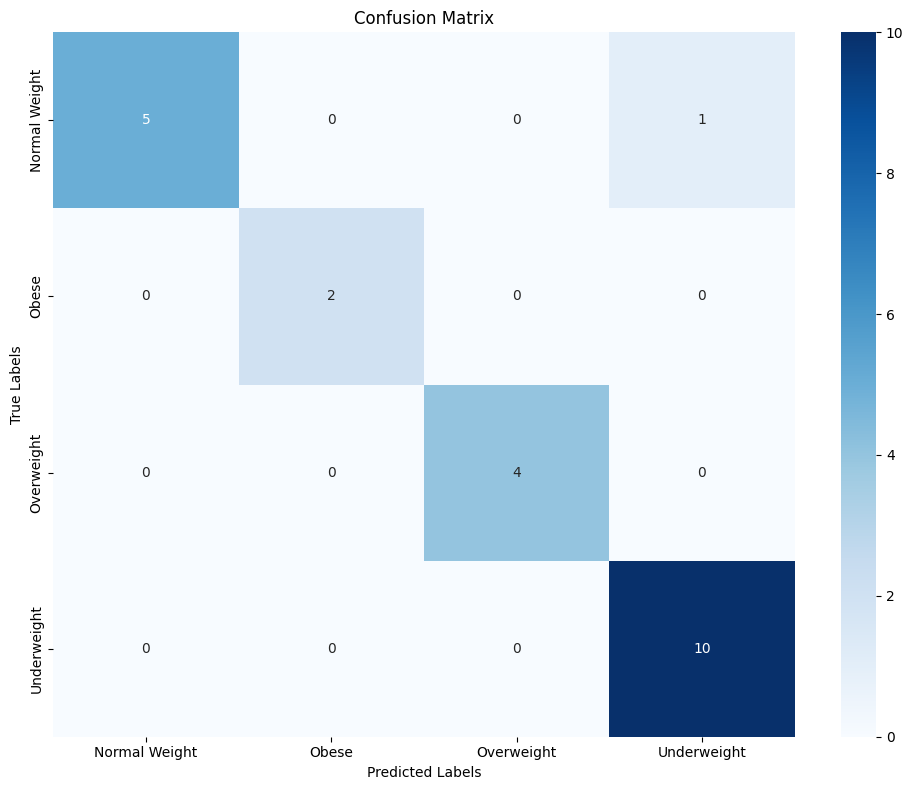

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [ ]:
# Find the optimal K value
print("\n--- Hyperparameter Tuning ---")
print("Finding optimal K value...")

# Calculate error for different K values
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())



--- Hyperparameter Tuning ---
Finding optimal K value...


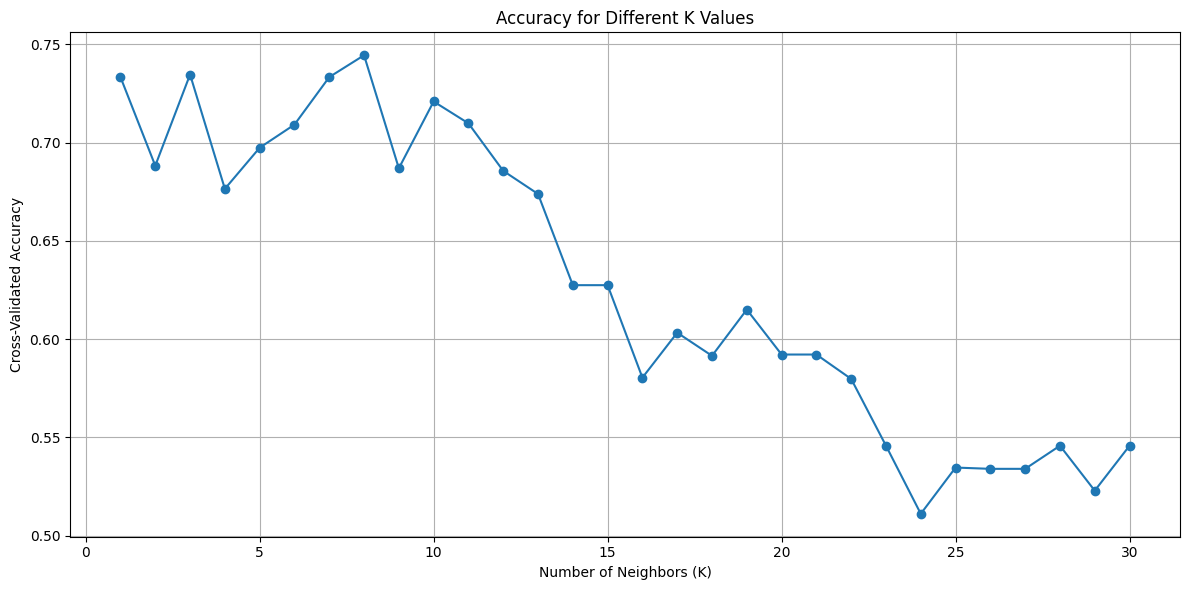

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Find the best K value
best_k = k_range[k_scores.index(max(k_scores))]
print(f"Best K value: {best_k}")

Best K value: 8


In [ ]:
# 5.2 Grid Search for optimal hyperparameters
print("\nPerforming Grid Search for optimal hyperparameters...")
param_grid = {
    'n_neighbors': [best_k-2, best_k-1, best_k, best_k+1, best_k+2],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Performing Grid Search for optimal hyperparameters...
Best parameters: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}
Best cross-validation score: 0.8039


In [ ]:
# Train the optimized model
print("\n--- Optimized Model Evaluation ---")
print("Training optimized KNN model...")
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)


--- Optimized Model Evaluation ---
Training optimized KNN model...


KNeighborsClassifier(metric='manhattan', n_neighbors=8)

In [ ]:
# Make predictions with the optimized model
y_pred_optimized = best_knn.predict(X_test_scaled)

In [ ]:
# Evaluate the optimized model
print(f"Optimized Model Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=label_encoder.classes_))

Optimized Model Accuracy: 0.9091

Optimized Classification Report:
               precision    recall  f1-score   support

Normal Weight       0.86      1.00      0.92         6
        Obese       0.67      1.00      0.80         2
   Overweight       1.00      0.50      0.67         4
  Underweight       1.00      1.00      1.00        10

     accuracy                           0.91        22
    macro avg       0.88      0.88      0.85        22
 weighted avg       0.93      0.91      0.90        22



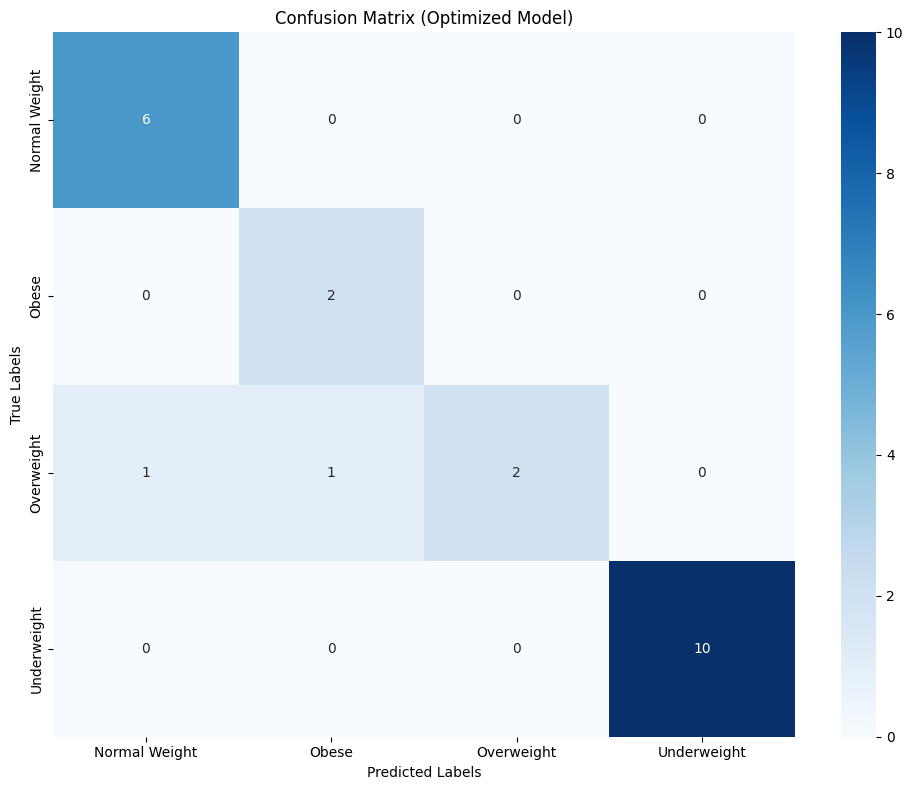

In [ ]:
# Plot confusion matrix for optimized model
plt.figure(figsize=(10, 8))
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Optimized Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze feature importance by checking model performance with different feature combinations
print("\n--- Feature Importance Analysis ---")
features = ['Age', 'Gender_Encoded', 'Height', 'Weight']
feature_scores = []


--- Feature Importance Analysis ---


In [ ]:
# Test each feature individually
for i, feature in enumerate(features):
    X_single = X_train_scaled[:, i].reshape(-1, 1)
    X_test_single = X_test_scaled[:, i].reshape(-1, 1)

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_single, y_train)
    y_pred_single = knn.predict(X_test_single)
    score = accuracy_score(y_test, y_pred_single)
    feature_scores.append(score)
    print(f"Accuracy using only {feature}: {score:.4f}")

Accuracy using only Age: 0.5000
Accuracy using only Gender_Encoded: 0.5000
Accuracy using only Height: 0.5455
Accuracy using only Weight: 1.0000


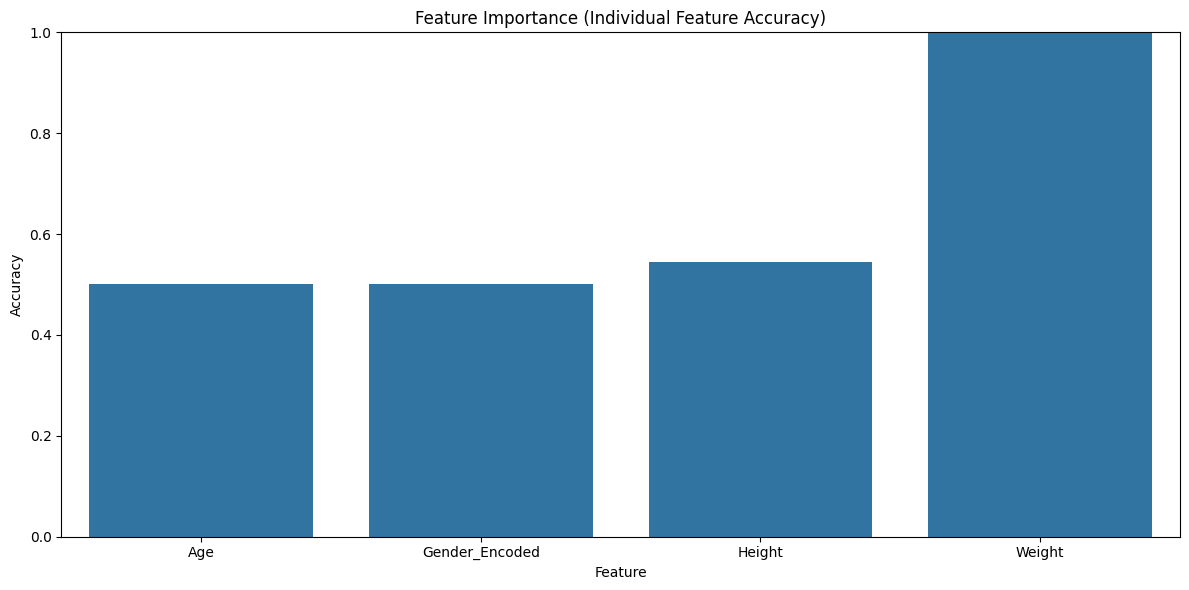

In [ ]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=feature_scores)
plt.title('Feature Importance (Individual Feature Accuracy)')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
print("\n--- Conclusion and Insights ---")
print(f"1. The best K value for our KNN model is {best_k}.")
print(f"2. The optimized model achieved an accuracy of {accuracy_score(y_test, y_pred_optimized):.4f}.")
print("3. Key factors in obesity classification based on our analysis:")


--- Conclusion and Insights ---
1. The best K value for our KNN model is 8.
2. The optimized model achieved an accuracy of 0.9091.
3. Key factors in obesity classification based on our analysis:


In [ ]:
# Sort features by importance
sorted_features = [x for _, x in sorted(zip(feature_scores, features), reverse=True)]
for i, feature in enumerate(sorted_features):
    print(f"   {i+1}. {feature}")

print("\n4. The correlation analysis showed that:")
high_correlations = []
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_correlations.append(f"   - {numerical_features[i]} and {numerical_features[j]} have a correlation of {correlation_matrix.iloc[i, j]:.2f}")

for corr in high_correlations:
    print(corr)

print("\n5. Additional insights:")
print("   - The dataset contains", len(df), "records with", len(df.columns), "features.")
print(f"   - The dataset has {label_counts.shape[0]} unique obesity categories with '{label_counts.idxmax()}' being the most common.")
print(f"   - Gender distribution is relatively balanced with {df['Gender'].value_counts()['Male']} males and {df['Gender'].value_counts()['Female']} females.")

   1. Weight
   2. Height
   3. Gender_Encoded
   4. Age

4. The correlation analysis showed that:
   - Weight and BMI have a correlation of 0.97

5. Additional insights:
   - The dataset contains 108 records with 9 features.
   - The dataset has 4 unique obesity categories with 'Underweight' being the most common.
   - Gender distribution is relatively balanced with 56 males and 52 females.
